## Hepatatis Classification

Given the medical patient data, let's try to predict whether a given patient will survive or not.

We will use a Random Forest Classifier (RFC) model from Sklearn to make our predictions.

In [645]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # Matplotlib provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.
import seaborn as sns # Seaborn is a high-level library. It provides simple codes to visualize complex statistical plots, which also happen to be 
# aesthetically pleasing. But Seaborn was built on top of Matplotlib, meaning it can be further powered up with Matplotlib functionalities.
sns.set_style('darkgrid') # Set the parameters that control the general style of the plots.

from sklearn.decomposition import PCA   # Principal component analysis (PCA). Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
from sklearn.cluster import KMeans  # K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances. 
#For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.


from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance.

from sklearn.ensemble import RandomForestClassifier  #A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [646]:
data = pd.read_csv('hepatitis_csv.csv')

In [647]:
data.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [648]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

# Preprocessing

In [649]:
data.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [650]:
# This gives the percentage of missing value based on the total number of values i.e., 155
data.isna().mean(axis=0)

age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
class              0.000000
dtype: float64

In [651]:
# Identify the continuous numeric features from the categorical features

continuos_features = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Fill missing continuos values with the mean value across the entire column
for column in continuos_features:
    data[column]= data[column].fillna(data[column].mean(axis=0))

# Fill missing categorical values with the mode value that is the value that appears more often
for column in data.columns.drop(continuos_features):
    data[column]= data[column].fillna(data[column].mode().sample(1, random_state=1).values[0])

In [652]:
data.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.000000,85.000000,18.00000,4.000000,61.852273,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.900000,135.000000,42.00000,3.500000,61.852273,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.700000,96.000000,32.00000,4.000000,61.852273,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.700000,46.000000,52.00000,4.000000,80.000000,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.325397,200.00000,4.000000,61.852273,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.900000,95.000000,28.00000,4.000000,75.000000,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,1.427517,105.325397,85.89404,3.817266,61.852273,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.325397,85.89404,3.817266,61.852273,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.700000,105.325397,48.00000,4.400000,61.852273,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.000000,105.325397,120.00000,3.900000,61.852273,False,live


In [653]:
data.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

So we have removed the missing values by replacing the missing continuos values with the Mean and the categorical values with the Modes

In [654]:
# Now let's convert the Boolean columns into integer columns

for column in data.select_dtypes('bool'):
    data[column] = data[column].astype(np.int)

In [655]:
data.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,0,0,0,0,0,0,0,0,0,0,0,1.000000,85.000000,18.00000,4.000000,61.852273,0,live
1,50,female,0,0,1,0,0,0,0,0,0,0,0,0.900000,135.000000,42.00000,3.500000,61.852273,0,live
2,78,female,1,0,1,0,0,1,0,0,0,0,0,0.700000,96.000000,32.00000,4.000000,61.852273,0,live
3,31,female,1,1,0,0,0,1,0,0,0,0,0,0.700000,46.000000,52.00000,4.000000,80.000000,0,live
4,34,female,1,0,0,0,0,1,0,0,0,0,0,1.000000,105.325397,200.00000,4.000000,61.852273,0,live
5,34,female,1,0,0,0,0,1,0,0,0,0,0,0.900000,95.000000,28.00000,4.000000,75.000000,0,live
6,51,female,0,0,1,0,1,1,0,1,1,0,0,1.427517,105.325397,85.89404,3.817266,61.852273,0,die
7,23,female,1,0,0,0,0,1,0,0,0,0,0,1.000000,105.325397,85.89404,3.817266,61.852273,0,live
8,39,female,1,0,1,0,0,1,1,0,0,0,0,0.700000,105.325397,48.00000,4.400000,61.852273,0,live
9,30,female,1,0,0,0,0,1,0,0,0,0,0,1.000000,105.325397,120.00000,3.900000,61.852273,0,live


In [656]:
# The sex column has text, so let's convert its content into binary feauture with integers

data['sex'] = data['sex'].replace({'female':0, 'male':1})

In [657]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,61.852273,0,live
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,61.852273,0,live
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,61.852273,0,live
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,live
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,61.852273,0,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,105.325397,242.0,3.3,50.000000,1,die
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.000000,142.0,4.3,61.852273,1,live
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.000000,20.0,4.1,61.852273,1,live
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.000000,19.0,4.1,48.000000,1,live


In [658]:
# Let's shuffle the datasets. Shuffling data serves the purpose of reducing 
# variance and making sure that models remain general and overfit less. 
# The obvious case where you'd shuffle your data is if your data is sorted by their 
# class/target. Here, you will want to shuffle to make sure that your 
# training/test/validation sets are representative of the overall distribution of the data.

data = data.sample(frac=1.0, random_state=1).reset_index(drop=True)

In [659]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,50,0,1,0,0,0,0,1,0,0,0,0,0,1.0,139.000000,81.0,3.900000,62.000000,1,live
1,32,0,0,1,1,1,0,1,0,0,0,0,0,1.0,55.000000,45.0,4.100000,56.000000,0,live
2,39,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.000000,20.0,4.000000,61.852273,0,live
3,62,0,0,0,1,1,0,1,0,0,0,0,0,1.0,105.325397,60.0,3.817266,61.852273,0,die
4,37,0,1,0,1,0,0,1,0,0,1,0,0,0.6,67.000000,28.0,4.200000,61.852273,0,die
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,72,0,1,1,1,0,0,1,1,0,0,0,0,1.0,115.000000,52.0,3.400000,50.000000,1,live
151,38,0,1,0,0,0,0,1,1,0,1,0,1,1.6,130.000000,140.0,3.500000,56.000000,1,live
152,51,0,1,0,1,1,1,1,0,0,0,0,0,0.9,76.000000,271.0,4.400000,61.852273,0,live
153,36,0,0,0,1,1,1,0,1,0,1,0,1,1.7,295.000000,60.0,2.700000,61.852273,1,live


In [660]:
# Let's change the label name of column 'class' as Python may incurr in errors with this particular name

data = data.rename(columns={'class': 'label'})

# Let's drop 'protime' column as it has an high number of missing values

data = data.drop('protime', axis=1)

In [661]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,label
0,50,0,1,0,0,0,0,1,0,0,0,0,0,1.0,139.000000,81.0,3.900000,1,live
1,32,0,0,1,1,1,0,1,0,0,0,0,0,1.0,55.000000,45.0,4.100000,0,live
2,39,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.000000,20.0,4.000000,0,live
3,62,0,0,0,1,1,0,1,0,0,0,0,0,1.0,105.325397,60.0,3.817266,0,die
4,37,0,1,0,1,0,0,1,0,0,1,0,0,0.6,67.000000,28.0,4.200000,0,die
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,72,0,1,1,1,0,0,1,1,0,0,0,0,1.0,115.000000,52.0,3.400000,1,live
151,38,0,1,0,0,0,0,1,1,0,1,0,1,1.6,130.000000,140.0,3.500000,1,live
152,51,0,1,0,1,1,1,1,0,0,0,0,0,0.9,76.000000,271.0,4.400000,0,live
153,36,0,0,0,1,1,1,0,1,0,1,0,1,1.7,295.000000,60.0,2.700000,1,live


In [662]:
# Let' split the dataset into X and y

y = data['label']
X = data.drop('label', axis=1)

In [663]:
y

0      live
1      live
2      live
3       die
4       die
       ... 
150    live
151    live
152    live
153    live
154    live
Name: label, Length: 155, dtype: object

In [664]:
X

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology
0,50,0,1,0,0,0,0,1,0,0,0,0,0,1.0,139.000000,81.0,3.900000,1
1,32,0,0,1,1,1,0,1,0,0,0,0,0,1.0,55.000000,45.0,4.100000,0
2,39,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.000000,20.0,4.000000,0
3,62,0,0,0,1,1,0,1,0,0,0,0,0,1.0,105.325397,60.0,3.817266,0
4,37,0,1,0,1,0,0,1,0,0,1,0,0,0.6,67.000000,28.0,4.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,72,0,1,1,1,0,0,1,1,0,0,0,0,1.0,115.000000,52.0,3.400000,1
151,38,0,1,0,0,0,0,1,1,0,1,0,1,1.6,130.000000,140.0,3.500000,1
152,51,0,1,0,1,1,1,1,0,0,0,0,0,0.9,76.000000,271.0,4.400000,0
153,36,0,0,0,1,1,1,0,1,0,1,0,1,1.7,295.000000,60.0,2.700000,1


## Clustering 

Let's do Clustering - we are using K-means that is an unsupervised learning algorithm. The way it works, it initialises cluster centres for how many clusters (K) we like

In [665]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int32)

In [666]:
# Let's visualise the clustering but because we cannot plot 19 dimensional graphs we will compress it to 2 dimensions plot using PCA analysis (Principal Component Analysis) for dimensionality reduction 

pca = PCA(n_components=2)

X_reduced = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=['PC1', 'PC2'])


In [667]:
X_reduced

,PC1,PC2
0,-0.156784,33.985844
1,-47.480043,-44.246585
2,-68.074458,-11.148539
3,-25.410838,3.443089
4,-62.627490,-30.060720
...,...,...
150,-31.900658,14.081721
151,56.925060,17.084838
152,179.475538,-54.335850
153,0.161601,191.461845


In [668]:
# Let's add label and cluster columns

X_reduced= pd.concat([X_reduced, y, pd.Series(cluster_labels, name='cluster')], axis= 1)
X_reduced

,PC1,PC2,label,cluster
0,-0.156784,33.985844,live,0
1,-47.480043,-44.246585,live,0
2,-68.074458,-11.148539,live,0
3,-25.410838,3.443089,die,0
4,-62.627490,-30.060720,die,0
...,...,...,...,...
150,-31.900658,14.081721,live,0
151,56.925060,17.084838,live,0
152,179.475538,-54.335850,live,1
153,0.161601,191.461845,live,0


In [669]:
# Let's look at the k_means now

kmeans.cluster_centers_

array([[4.09548872e+01, 1.05263158e-01, 5.11278195e-01, 1.65413534e-01,
        6.16541353e-01, 3.68421053e-01, 1.87969925e-01, 8.42105263e-01,
        3.53383459e-01, 1.87969925e-01, 3.00751880e-01, 1.27819549e-01,
        1.05263158e-01, 1.32755715e+00, 1.01760413e+02, 5.81772644e+01,
        3.83038892e+00, 4.36090226e-01],
       [4.26818182e+01, 9.09090909e-02, 5.00000000e-01, 9.09090909e-02,
        8.63636364e-01, 5.45454545e-01, 3.18181818e-01, 8.18181818e-01,
        5.90909091e-01, 2.27272727e-01, 5.00000000e-01, 1.36363636e-01,
        1.81818182e-01, 2.03181818e+00, 1.26877345e+02, 2.53454545e+02,
        3.73793329e+00, 5.45454545e-01]])

In [670]:
# As we have 2 clusters, each of them has 19 values to represent it. We are going to use the PCA method to transform the cluster_centers into 2 dimensions cluster_centers

centroids = pca.transform(kmeans.cluster_centers_)
centroids

array([[-27.94520761,   0.24806259],
       [168.94148236,  -1.4996511 ]])

In [671]:
# We have converted the two centers into two dimensions coordinates

## Plotting

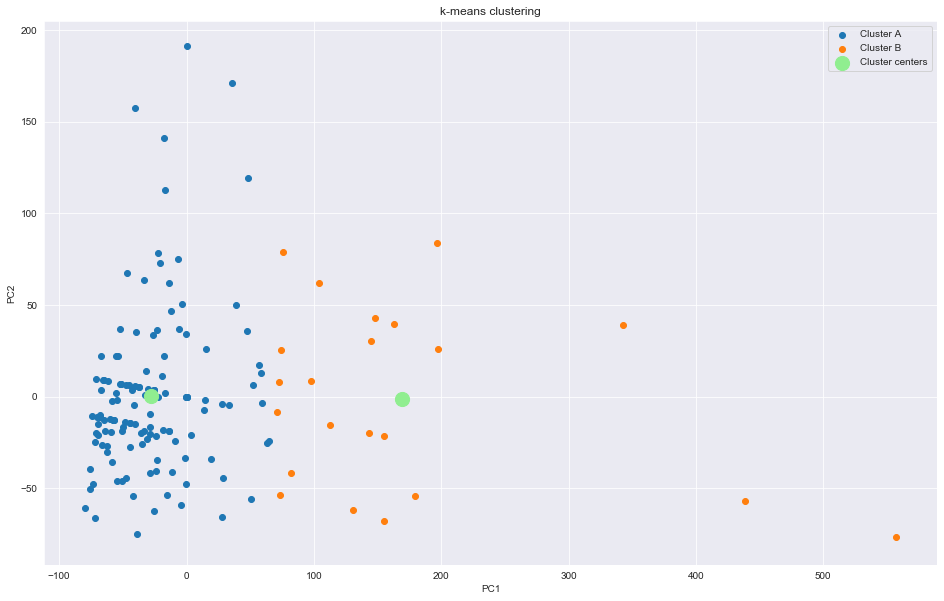

In [672]:
# Let's set up a new plot figure for clustering


cluster_0_examples= X_reduced.query('cluster == 0')
cluster_1_examples= X_reduced.query('cluster == 1')

plt.figure(figsize=(16, 10))

plt.scatter(cluster_0_examples['PC1'], cluster_0_examples['PC2'], label='Cluster A')
plt.scatter(cluster_1_examples['PC1'], cluster_1_examples['PC2'], label='Cluster B')

# Let's plot the centroids
plt.scatter(centroids[:, 0], centroids[:,1], c='lightgreen', s=200, label='Cluster centers')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-means clustering')
plt.legend()
plt.show()


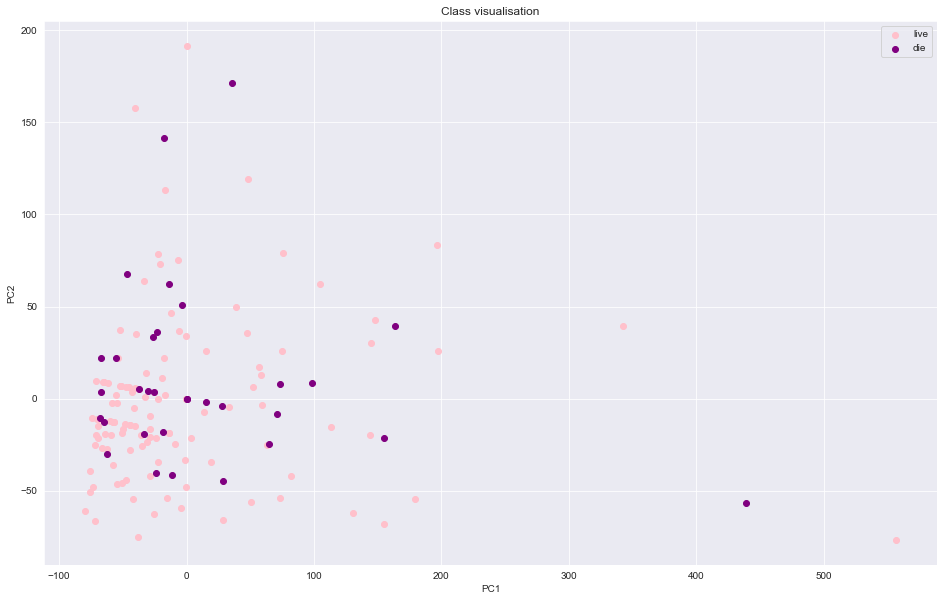

In [673]:
# Let's set up a new plot figure to visualise the class distribution in 2-dimensions

live_examples= X_reduced.query("label == 'live' ")
die_examples= X_reduced.query("label == 'die' ")

plt.figure(figsize=(16, 10))

plt.scatter(live_examples['PC1'], live_examples['PC2'], c='pink', label="live")
plt.scatter(die_examples['PC1'], die_examples['PC2'], c= 'purple', label="die")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Class visualisation')
plt.legend()
plt.show()

## Training

In [674]:
# Let's use the Random Forest Calssifier method 

# Let's Train-test split first

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [675]:
# Let's apply the Random Forest Classifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 87.23%


#### Conclusion: The test accuracy is pretty good - this result has been achieved by dropping the "protime" column as it had a large number of missing values. With the "protime" column included the accuracy is 85% 